In [ ]:
#Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
#----------------------------------------------------

In [ ]:
#Read the dataset from CSV File
data = pd.read_csv('data.csv')
data.head(5)

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [ ]:
#Dividing dataset into features and result
#Put Features into X
X = data[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'diff_sym_hos']]
print(X.shape)
X.head(5)

(863, 13)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0


In [ ]:
#Labeled Data
Y = data['result']
print(Y.shape)
Y.head()

(863,)


0    1
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [ ]:
#splite the data into Train and Test by 90% for training to 10% for testing
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .1, random_state = 3, shuffle = True)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(776, 13)
(87, 13)
(776,)
(87,)


In [ ]:
#normalize the data values
scaler = StandardScaler()
scaler.fit(xTrain)
xTrain=scaler.transform(xTrain)
xTest=scaler.transform(xTest)

In [ ]:
#GrideSearchCV to find the optimal hyperparameters by fit alot of models with difrrent hyperparameters and chose the best one with high accuracy
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'], 'C':[0.001,.009,0.01,.09,1,5,10,25, 1e5], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,  cv= 10 , n_jobs= -1,scoring = 'accuracy')
grid_clf_acc.fit(xTrain, yTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25,
                               100000.0],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
print(grid_clf_acc.best_score_)
print(grid_clf_acc.best_params_)
print(grid_clf_acc.best_estimator_)

0.9484848484848485
{'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=5, penalty='l1', solver='liblinear')


In [ ]:
#train the model with optimal hyperparameters
LogisticRegressionModel = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 5, random_state=1, max_iter = 500)
LogisticRegressionModel.fit(xTrain, yTrain)

LogisticRegression(C=5, max_iter=500, penalty='l1', random_state=1,
                   solver='liblinear')

In [ ]:
#test the accuracy of model on training set
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(xTrain, yTrain))
print('----------------------------------------------------')


LogisticRegressionModel Train Score is :  0.9536082474226805
----------------------------------------------------


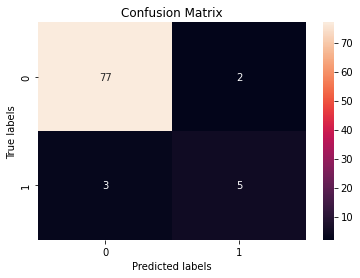

In [ ]:
#Calculating Prediction
yPred = LogisticRegressionModel.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


In [ ]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        79
           1       0.71      0.62      0.67         8

    accuracy                           0.94        87
   macro avg       0.84      0.80      0.82        87
weighted avg       0.94      0.94      0.94        87



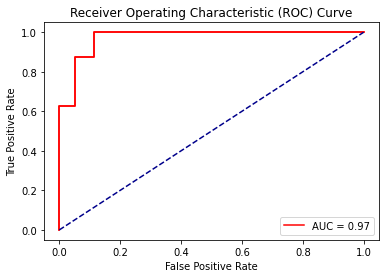

In [ ]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(yTest, LogisticRegressionModel.predict_proba(xTest)[:,1])

roc_auc = roc_auc_score(yTest, LogisticRegressionModel.predict_proba(xTest)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')